# TP 1 - Clustering(Fouille de Données et Apprentissage Artificiel)

**Rapport+code**

**Auteur: XIA Xuanzhe**

**M2-SIAD**

Instructions : Préparez un rapport incluant le code source et vos r´esultats,
et d´eposez-le sur Moodle. Il est recommand´e d’utliliser un jupyter notebook ou
encore l’IDE spider

## 1 Normalisation de données

La normalisation de données est une étape importante dans le processus de traitement de données. Par exemple, de nombreux éléments utilisés dans la
fonction objective d’un algorithme d’apprentissage (tels que le noyau RBF de Support Vector Machines ou la L1 et L2 régularisé des modèles linéaires) supposent que toutes les variables sont centrées autour de zéro et ont la variance dans le même ordre. Si une caractéristique a une variance qui est des ordres de grandeur plus grand que les autres, il pourrait dominer la fonction objectif et de faire l’estimateur incapable d’apprendre correctement comme prévu. En pratique, nous ignorons souvent la forme de la distribution de données et on simplement transforme les données en les centrent en retirant la valeur moyenne de chaque variable, puis en divisant les variables par leur écart-type.

Importez les librairies numpy (calcul scientifique) et preprocessing (prétraitement de données)

### Q1.1. Créez la matrice X suivante :

![matrice1](./img/matrice1.jpg)

In [874]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [875]:
# Créer un tableau numpy (array) avec des valeurs spécifiques
# Ce tableau est de dimension 3x3, avec trois lignes et trois 
# colonnes(Introduire les valeurs de la matrice donnée dans la question)
x = np.array([[1, -1, 2],[2, 0, 0],[0, 1 ,-1]])

### Q1.2. Visualisez X et calculez la moyenne et la variance de X.

matrice X is:
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


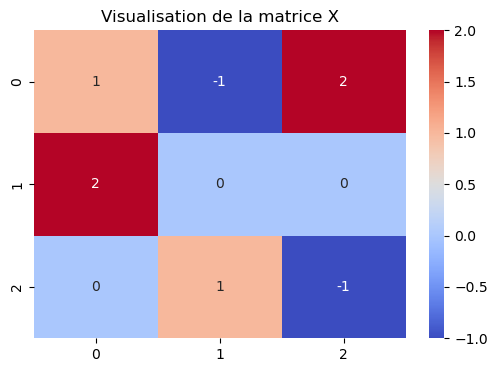

In [876]:
# Visualisation de la matrice X
print('matrice X is:\n',x)
# Visualiser la matrice avec une heatmap(J'ai utilisé cette méthode lors de mon stage)
plt.figure(figsize=(6, 4))
sns.heatmap(x, annot=True, cmap="coolwarm", cbar=True)
plt.title('Visualisation de la matrice X')
plt.show()


In [877]:
# Calcul de la moyenne et de la variance
# Affiche la moyenne des éléments de la matrice x
print("la moyenne de X:\n", x.mean())
# Affiche la variance des éléments de la matrice x
print("la variance de X:\n", x.var())

la moyenne de X:
 0.4444444444444444
la variance de X:
 1.1358024691358024


### Q1.3. Utilisez la fonction scale pour normaliser la matrice X. Que constatez vous ?

x_normalisation:
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


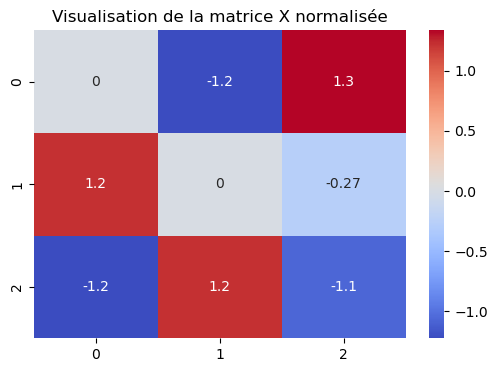

Moyenne après normalisation (doit être 0 pour chaque colonne) :
 [0. 0. 0.]
Variance après normalisation (doit être 1 pour chaque colonne) :
 [1. 1. 1.]


In [878]:
### Normalisation de la X
x_scale = preprocessing.scale(x)
print("x_normalisation:\n",x_scale)
# Visualiser la matrice normalisée avec une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(x_scale, annot=True, cmap="coolwarm", cbar=True)
plt.title('Visualisation de la matrice X normalisée')
plt.show()
print("Moyenne après normalisation (doit être 0 pour chaque colonne) :\n", x_scale.mean(axis=0))
print("Variance après normalisation (doit être 1 pour chaque colonne) :\n", x_scale.var(axis=0))

**Réponse:** 

*1. La somme de chaque colonne est égale à 0.*

*2. Après normalisation, chaque colonne de la matrice normalisée a une moyenne de 0. La variance de chaque colonne est de 1.*

### Q1.4 Calculer la moyenne et la variance de la matrice X normalisé. Expliquez le résultat obtenu

In [879]:
print("la moyenne de X normalisé:\n", x_scale.mean())
print("la variance de X normalisé:\n", x_scale.var())
print("Moyenne après normalisation (doit être 0 pour chaque colonne) :\n", x_scale.mean(axis=0))
print("Variance après normalisation (doit être 1 pour chaque colonne) :\n", x_scale.var(axis=0))

la moyenne de X normalisé:
 4.9343245538895844e-17
la variance de X normalisé:
 1.0
Moyenne après normalisation (doit être 0 pour chaque colonne) :
 [0. 0. 0.]
Variance après normalisation (doit être 1 pour chaque colonne) :
 [1. 1. 1.]


**Réponse:**: 

*1. Après normalisation, chaque colonne de la matrice normalisée a une moyenne de 0.(**Ceci est dû au fait que la fonction preprocessing.scale() centre les données en soustrayant la moyenne de chaque colonne.**) La variance de chaque colonne est de 1.*

*2. La fonction scale() ajuste les données pour que la distribution de chaque caractéristique ait une moyenne de 0 et une variance de 1. Cela permet d'équilibrer les caractéristiques lorsque leurs échelles initiales sont très différentes*

## 2. Normalisation MinMax

Un autre type de normalisation est de normaliser les caractéristiques (variables) de données entre un minimum et une valeur maximale donnée, souvent entre zéro et un. Ceci peut être réalisé en utilisant la fonction MinMaxScaler.


### Q2.1. Créez la matrice de données X2 suivante :

![matrice1](./img/matrice1.jpg)

Identique à la question 1.1

In [880]:
# Créer un tableau numpy (array) avec des valeurs spécifiques
# Ce tableau est de dimension 3x3, avec trois lignes et trois 
# colonnes(Introduire les valeurs de la matrice donnée dans la question)
x2 = np.array([[1, -1, 2],[2, 0, 0],[0, 1 ,-1]])

### Q2.2. Visualisez la matrice et calculez la moyenne sur les variables

matrice X2 is:
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


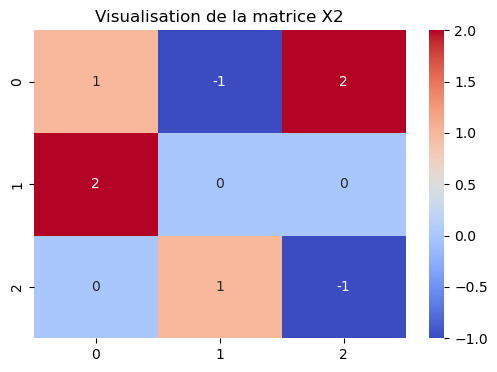

la moyenne de X2:
 0.4444444444444444
la variance de X2:
 1.1358024691358024


In [881]:
# Affiche la matrice x2. Cette ligne affiche le tableau de données sous forme de matrice
print('matrice X2 is:\n',x2)
# Visualiser la matrice avec une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(x2, annot=True, cmap="coolwarm", cbar=True)
plt.title('Visualisation de la matrice X2')
plt.show()

# Calcule et affiche la moyenne de l'ensemble des éléments de la matrice x2
# La moyenne est la somme de tous les éléments divisée par le nombre total d'éléments
print("la moyenne de X2:\n", x2.mean())
print("la variance de X2:\n", x2.var())

### Q2.3. Normalisez les données dans l’intervalle [0,1]. Visualisez les données normalisées et calculez la moyenne sur les variables. Que constatez-vous ?


x2_normalisation:
: [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


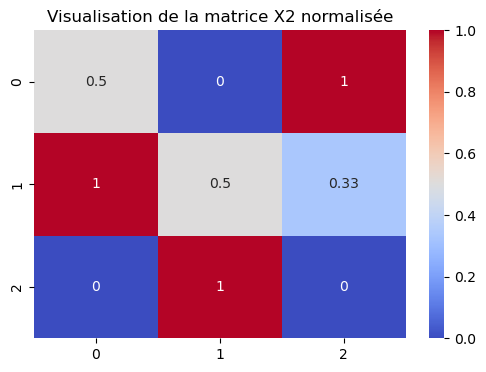

In [882]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(x2)
res = scaler.transform(x2)
print("x2_normalisation:\n:",res)
# Visualiser la matrice normalisée avec une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(res, annot=True, cmap="coolwarm", cbar=True)
plt.title('Visualisation de la matrice X2 normalisée')
plt.show()

In [883]:
print("la moyenne de X2:\n", res.mean())
print("la moyenne de X2:\n", res.mean(axis=0))

la moyenne de X2:
 0.48148148148148145
la moyenne de X2:
 [0.5        0.5        0.44444444]


**Réponse:**

*1. Pour la Visualisation : Une heatmap qui montre toutes les valeurs de la matrice entre 0 et 1.*

*2. Pour le Moyenne des variables normalisées : Les moyennes devraient être dans l'intervalle[0,1]. Cependant, elles ne seront pas égales à 0.5 en général, car cela dépend de la distribution des données d'origine.*

## 3. Analyse des Iris de Fisher avec l’algorithme K-Moyennes

### Q3.1.  Ouvrez le fichier iris.data en utilisant la commande read table(· · ·) avec les bons paramètres

In [884]:
# iris_data <- read.table("/data/iris.data", header = TRUE, sep = ",")
# Le prof dit qu'il est plus facile d'utiliser scikit-learn
iris = datasets.load_iris()

In [885]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Q3.2. La dernière colonne de vos données représente le label correspondant à l’espèce d’Iris associée. Stockez ces labels dans un vecteur séparé et enlevez-le de votre jeu de données.


In [886]:
# Créer un DataFrame contenant les données des caractéristiques
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Extraire les étiquettes (labels)->avantages de scikit-learn
labels = iris.target

# Afficher les données sans étiquettes
print("Données sans labels :")
print(df)

# Afficher les étiquettes avec une explication des valeurs
# 'setosa':0 'versicolor':1 'virginica':2
print("\nLabels :")
print(labels)

Données sans labels :
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Labels :
[0 0 0 0

### Q3.3 Utilisez la commande **sklearn.decomposition.PCA**( pour réaliser une analyse en composante principale de vos données. Puis, afin de récupérer vos données projetées dans 2 composantes.

Vous devriez maintenant avoir 2 jeux de données, le jeux de données original stocké dans une première variable (“data” par exemple), et le même jeu de données projeté sur 2 composantes stockée dans la variable X

In [887]:
# Importer les bibliothèques nécessaires
from sklearn.decomposition import PCA

In [888]:
# Initialiser l'objet PCA pour réduire à 2 composantes
pca = PCA(n_components=2, random_state=60)
# Réaliser l'analyse en composantes principales (ACP) et récupérer les données projetées
pca_result = pca.fit_transform(df)
X = pca_result

# Afficher les données projetées dans 2 composantes
print("Données projetées dans 2 composantes :")
print(X)

Données projetées dans 2 composantes :
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0

### Q3.4 Utilisez l’algorithme K-Means sur votre jeu de données X afin d’obtenir 3 clusters et visualisez les résultats. Affichez également les centroides sur la figure.

In [889]:
# Importer les bibliothèques nécessaires
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


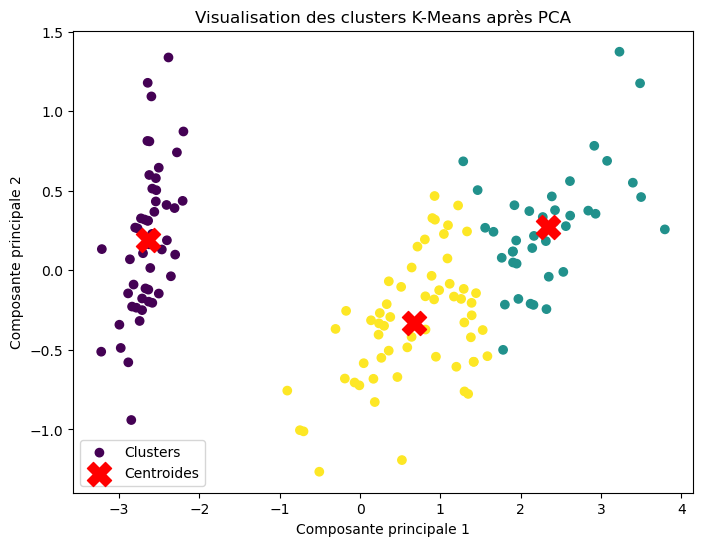

In [890]:
# Initialiser K-Means avec 3 clusters
kmeans = KMeans(random_state=12, n_clusters=3)
kmeans.fit_predict(X)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualiser les résultats et les centroides
plt.figure(figsize=(8, 6))

# Visualiser les points projetés avec les clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Clusters')

# Visualiser les centroides
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title("Visualisation des clusters K-Means après PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.show()

**Expliquer:**

*Le graphique affiche les points projetés sur les deux premières composantes principales, colorés selon leur cluster respectif. Chaque couleur représente n cluster différent, ce qui permet de visualiser comment les différentes espèces de fleurs (setosa, versicolor, virginica) se regroupent dans l'espace réduit.*

*Centroïdes : Les grandes croix rouges représentent les centroïdes de chaque cluster. Cela indique le "centre" des points de données pour chaque groupe et peut aider à comprendre où se situent les groupes par rapport aux données d'origine.*

### Q3.5. Répétez la question 4) plusieurs fois. Que constatez-vous ? Expliquez.

**Réponse:**

1. L'aléatoire de K-Means : L'algorithme K-Means commence par sélectionner aléatoirement les centroïdes initiaux. Les différentes initialisations peuvent donner des résultats variés.

2. Interprétation des clusters : Même si les clusters changent légèrement, vous devriez être capable de voir que setosa est généralement bien séparé des autres espèces. Les autres clusters peuvent être plus sujets à des variations en fonction des données et de leur distribution.

Le cours TP a déjà demandé à le professeur de changer random_state, et celui-ci n'a pas changé(c'est étrange), donc cette conclusion est basée sur la première classe théorique.

L'exécution de K-Means plusieurs fois vous permet de comprendre la stabilité et la variabilité des résultats. Cela met en évidence la nature aléatoire de l'algorithme et l'importance de choisir judicieusement les paramètres pour obtenir des résultats robustes.

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


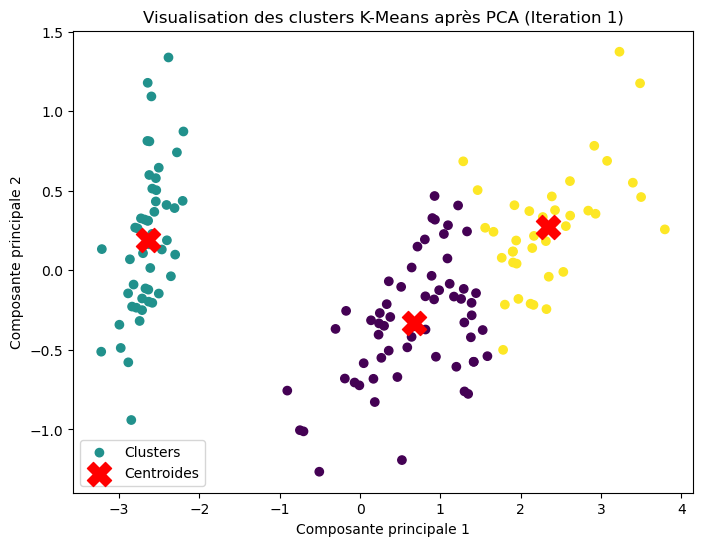

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


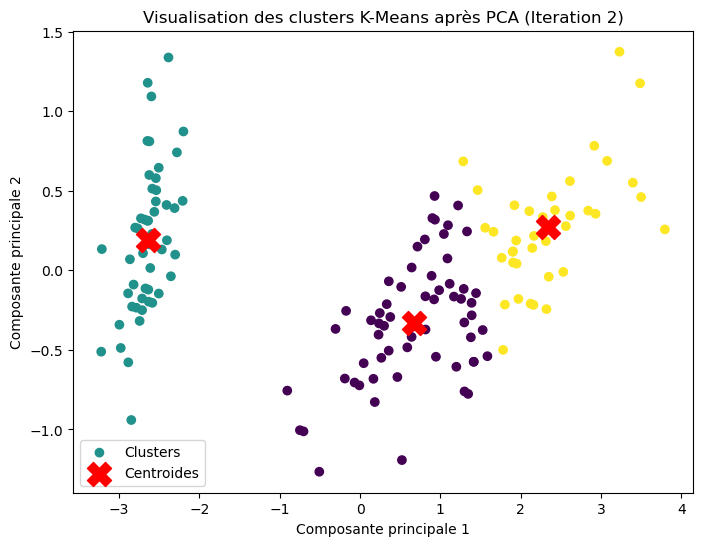

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


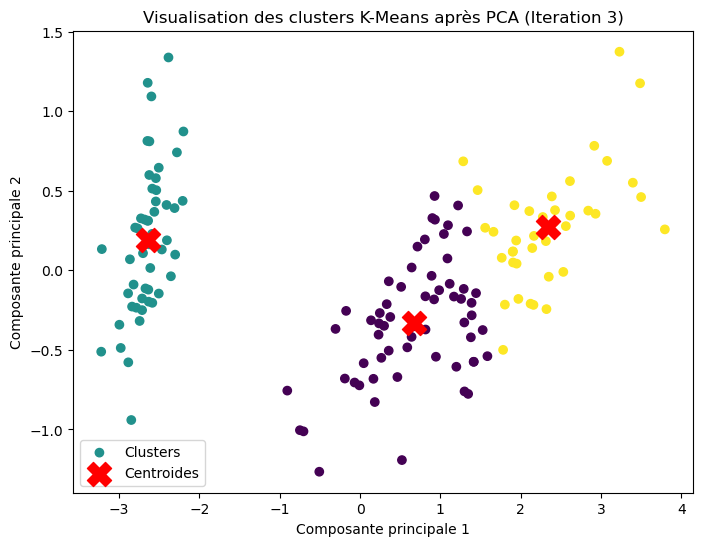

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


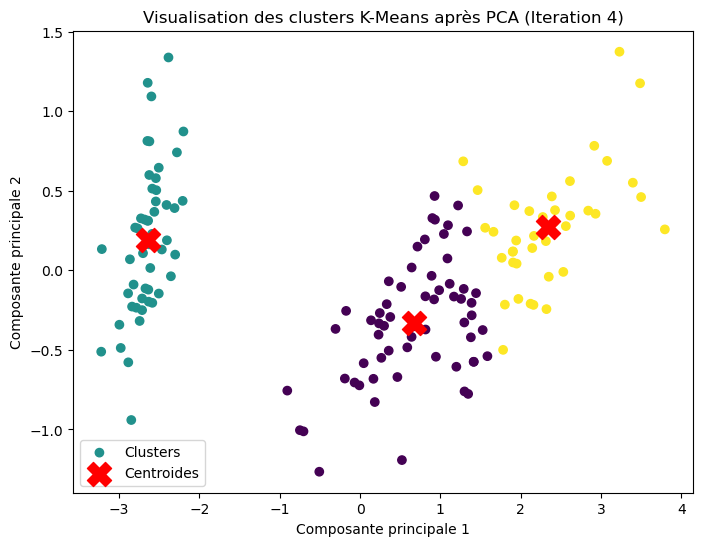

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


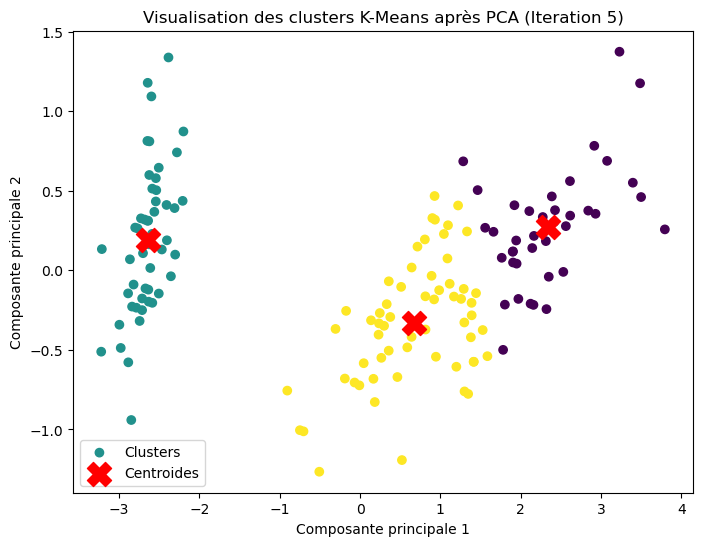

In [891]:
# Modifier 5 pour le nombre de répétitions souhaité
for i in range(5):
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=i)
    kmeans.fit_predict(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Visualiser les résultats et les centroides
    plt.figure(figsize=(8, 6))

    # Visualiser les points projetés avec les clusters
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Clusters')

    # Visualiser les centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

    plt.title(f"Visualisation des clusters K-Means après PCA (Iteration {i+1})")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend()
    plt.show()

### Q3.6. En utilisant la commande plot(· · ·) du package plot matplotlib comme dans la question 4, projetez les labels que vous aviez stock´es dans un vecteur `a part `a la question 2). Comparez visuellement les r´esultats de vos clustering avec ces labels. Commentez.


**Réponse:** 

**Visualisation des clusters K-Means :** *Dans le premier sous-graphe, vous verrez les points projetés colorés en fonction des clusters identifiés par K-Means. Chaque couleur représente un cluster différent.*

**Visualisation des étiquettes réelles :** *Dans le second sous-graphe, les points projetés sont colorés en fonction des étiquettes réelles des espèces. Chaque couleur correspond à une espèce de fleur (setosa, versicolor, virginica).*

**Je pense qu'il peut être analysé de deux manières**

**Comparer les deux graphiques pour voir dans quelle mesure les clusters K-Means correspondent aux étiquettes réelles.**

*J'ai constaté que setosa est généralement bien séparé des autres espèces, ce qui se reflète à la fois dans les résultats de K-Means et dans les étiquettes réelles. En revanche, les clusters pour versicolor et virginica peuvent se chevaucher davantage, ce qui indique qu'ils peuvent être plus difficiles à distinguer par K-Means.*


**Si les grappes identifiées par l'algorithme K-Means se chevauchent de manière significative avec les étiquettes réelles, cela peut indiquer que l'algorithme K-Means a réussi à capturer la structure des données. Si les grappes ne correspondent pas aux étiquettes réelles, cela peut indiquer que l'algorithme K-Means n'est pas adapté à ce type de données ou que d'autres méthodes de regroupement ou de prétraitement sont nécessaires.**

*Dans le graphique généré par le code, je peux voir que les grappes identifiées se chevauchent presque avec les étiquettes réelles, ce qui prouve que l'algorithme K-Means a réussi à capturer les données en tant que résultat.*

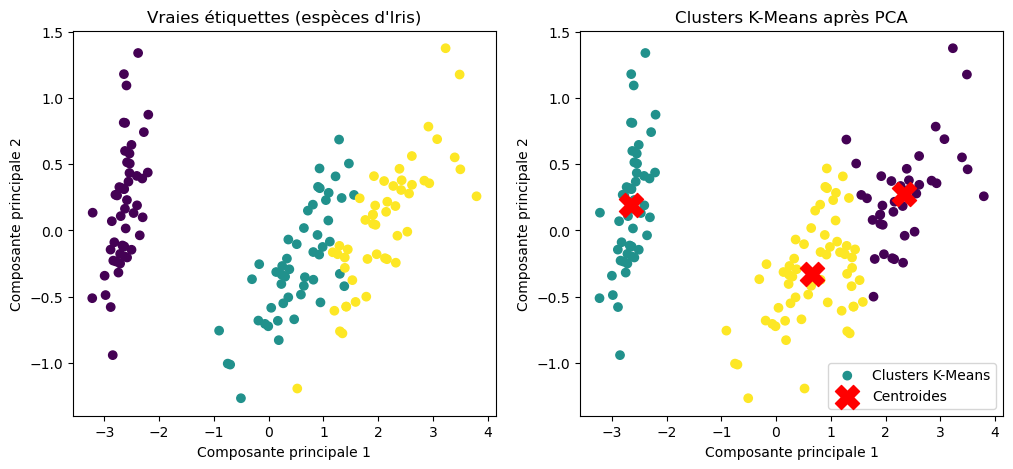

In [892]:
# Afficher les vrais labels
plt.figure(figsize=(12, 5))

# Graphique 1 : Vrais labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Vrais labels')
plt.title("Vraies étiquettes (espèces d'Iris)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")

# Graphique 2 : Clusters K-Means
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Clusters K-Means')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.title("Clusters K-Means après PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()

plt.show()


### Q3.7. Afficher le tableau de contingence comparant vos résultats aux labels théoriques.

In [893]:
# Importer les bibliothèques nécessaires
from sklearn.metrics import confusion_matrix
import seaborn as sns

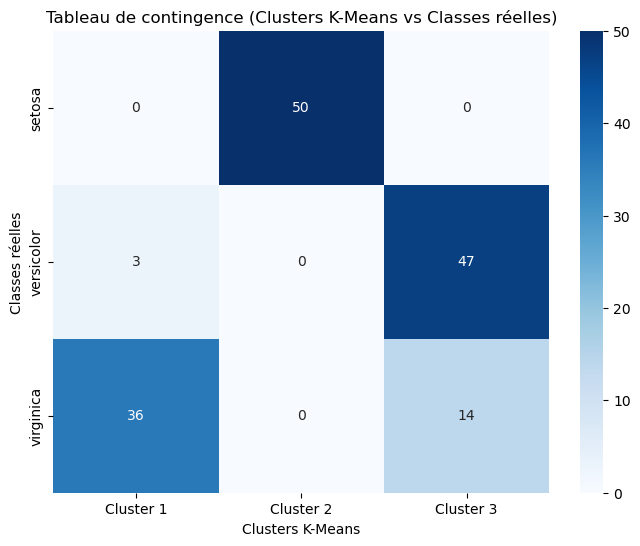

In [894]:
confusion = confusion_matrix(labels, clusters)
plt.figure(figsize=(8, 6))
# Créer la matrice de confusion pour comparer les labels réels et les clusters
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'],
            yticklabels=iris.target_names)
plt.title("Tableau de contingence (Clusters K-Means vs Classes réelles)")
plt.ylabel('Classes réelles')
plt.xlabel('Clusters K-Means')
plt.show()

**Analyse les résultats:**

**Correspondance des clusters avec Setosa :**

1. Le cluster 2 regroupe parfaitement les 50 échantillons de Setosa. Cela indique que l'algorithme K-Means a correctement identifié ce groupe.
2. Il n'y a aucun mélange de Setosa dans les autres clusters (Cluster 1 et Cluster 3), ce qui montre que cet ensemble est bien séparé des autres espèces.

**Correspondance des clusters avec Versicolor :**

1. Le cluster 3 contient 47 des 50 échantillons de Versicolor, mais 3 échantillons ont été mal classés dans le Cluster 1.
2. Cela montre que l'algorithme K-Means a généralement bien séparé Versicolor, mais avec quelques erreurs.

**Correspondance des clusters avec Virginica :**

1. Le cluster 1 est plus problématique, car il contient un mélange d'échantillons de Virginica (36) et de Versicolor (3).
2. Le Cluster 3 contient 14 échantillons de Virginica, mais la majorité de ses échantillons se trouvent dans le Cluster 1. Cela montre que K-Means a eu du mal à bien séparer Virginica et Versicolor.


### Q3.7. Choisissez une de vos solutions de clustering et calculez l’indice de Silhouette associé à vos données. Commentez

**Réponse:** *Un score de 0.5977 indique que les clusters formés par K-Means sont plutôt bien séparés, ce qui signifie que l'algorithme a réussi à identifier des groupes distincts dans les données projetées en 2 dimensions.
Cependant, il est possible que certains points, en particulier ceux qui se trouvent à la frontière entre deux clusters, soient moins bien classés, ce qui fait baisser légèrement la valeur de l'indice.
Cela correspond à ce que nous avons observé dans l'analyse précédente : Setosa est très bien séparée, tandis que Versicolor et Virginica sont plus difficiles à distinguer.*

In [895]:
# Importer les bibliothèques nécessaires
from sklearn.metrics import silhouette_score

In [896]:
# Appliquer K-Means sur les données projetées avec PCA
kmeans = KMeans(random_state=1000, n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_  # Les clusters obtenus

# Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(X, clusters)

print(f"Indice de Silhouette moyen pour le clustering K-Means: {silhouette_avg:.4f}")

Indice de Silhouette moyen pour le clustering K-Means: 0.5977


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Q3.9 Refaites les questions 4) à 8) en utilisant les données originales (“data”)
plutôt que les donn´ees projetées. Les différences sont-elles importantes
? Vous expliquerez quels peuvent ˆetre les avantages et inconvénients
d’utiliser les donn´ees originales ou bien les données projetées.

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


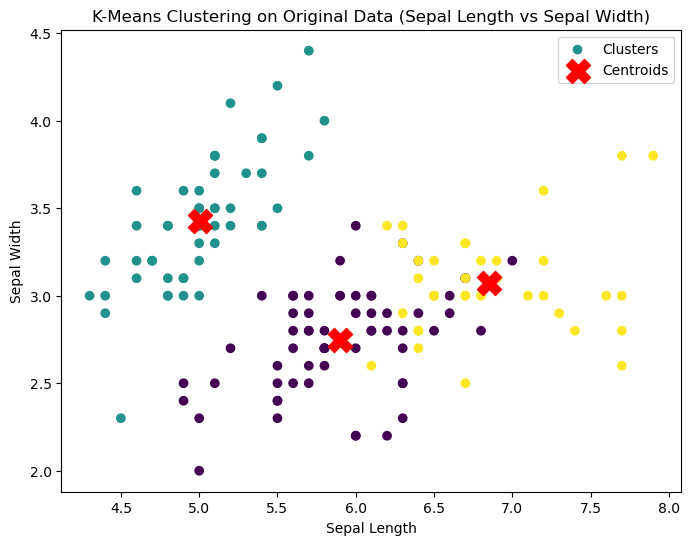

In [897]:
# Appliquer K-Means sur les données originales avec un nombre de clusters fixé à 3
kmeans_original = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters_original = kmeans_original.fit_predict(df)
centroids_original = kmeans_original.cluster_centers_

# Visualiser les clusters et les centroïdes (en utilisant les 2 premières caractéristiques)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_original, cmap='viridis', label='Clusters')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Original Data (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


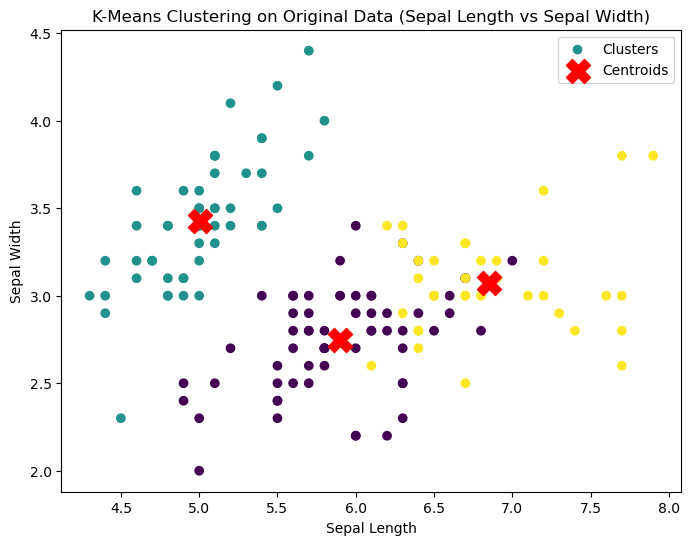

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


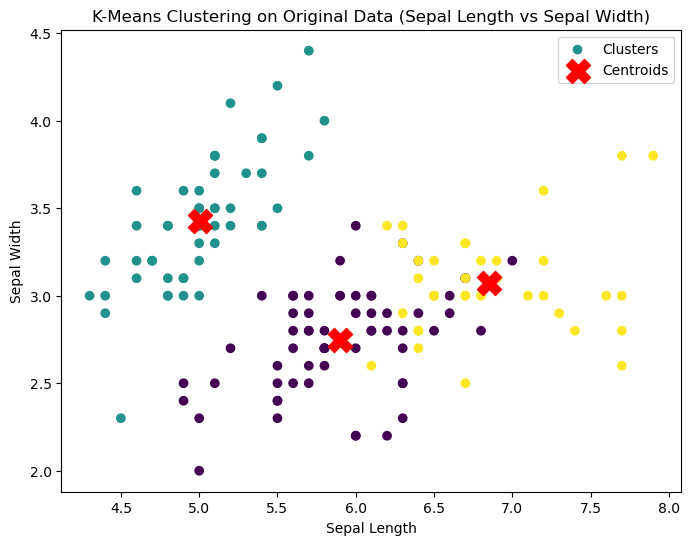

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


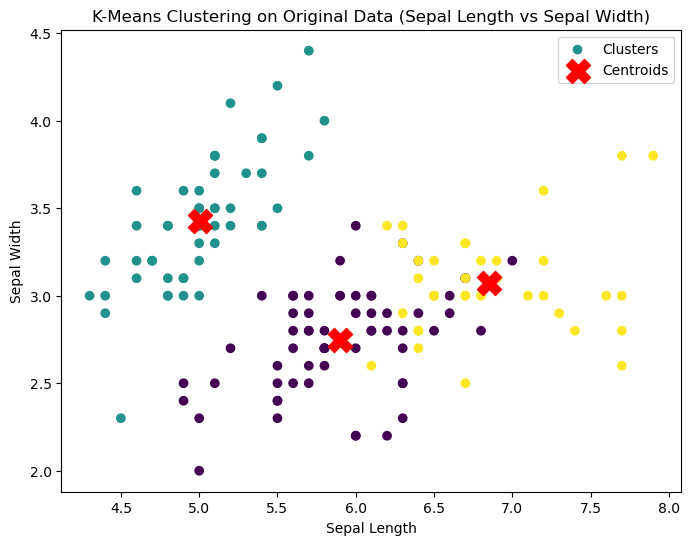

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


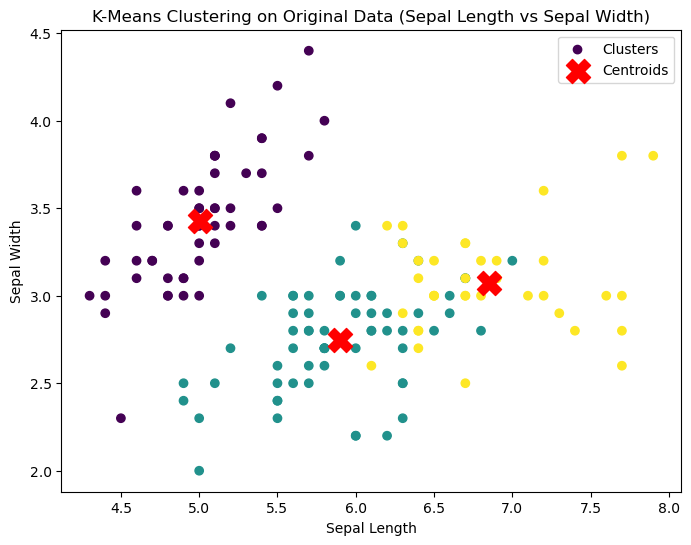

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


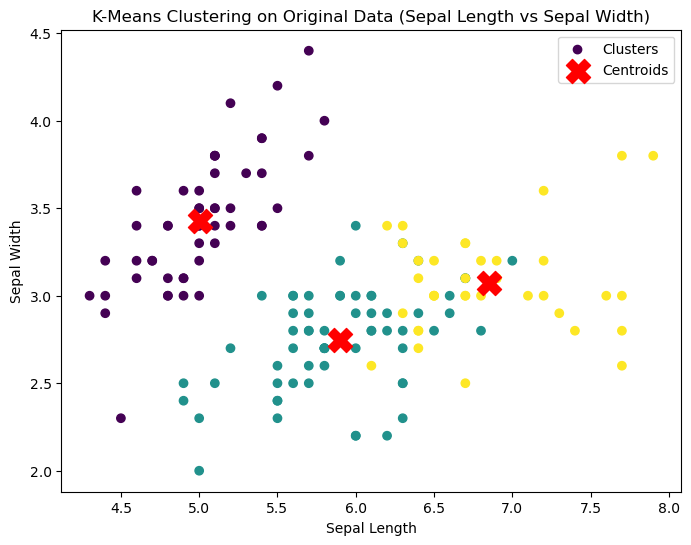

In [898]:
# Répéter le clustering plusieurs fois avec différentes initialisations
for i in range(5):
    kmeans_original = KMeans(n_clusters=3, n_init=10, random_state=i)
    clusters_original = kmeans_original.fit_predict(df)
    centroids_original = kmeans_original.cluster_centers_


    plt.figure(figsize=(8, 6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_original, cmap='viridis', label='Clusters')
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title("K-Means Clustering on Original Data (Sepal Length vs Sepal Width)")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()
    plt.show()

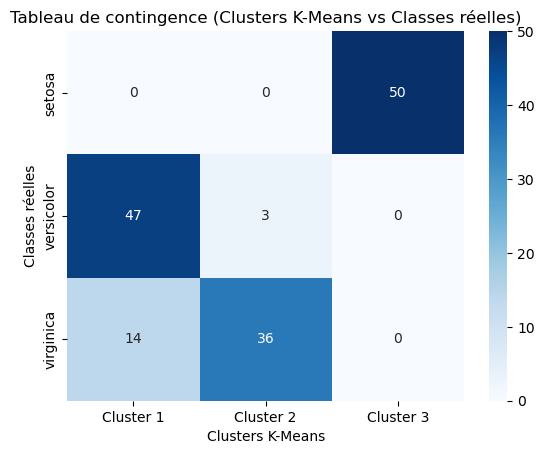

In [899]:
# Créer la matrice de confusion pour comparer les labels réels et les clusters
confusion = confusion_matrix(labels, clusters)

# Créer une heatmap pour visualiser la matrice de confusion, avant j'ai déjà utilisé(1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'],
            yticklabels=iris.target_names)
# Tableau de contingence comparant les résultats aux labels théoriques :
plt.title("Tableau de contingence (Clusters K-Means vs Classes réelles)")
plt.ylabel('Classes réelles')
plt.xlabel('Clusters K-Means')
plt.show()

In [900]:
# Appliquer K-Means sur les données projetées avec PCA
kmeans = KMeans(random_state=1000, n_clusters=3)
kmeans.fit(df)
clusters = kmeans.labels_  # Les clusters obtenus

# Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(df, clusters)

print(f"Indice de Silhouette moyen pour le clustering K-Means: {silhouette_avg:.4f}")

Indice de Silhouette moyen pour le clustering K-Means: 0.5528


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Analyse:**

 *L'utilisation des données projetées peut faciliter l'interprétation des clusters et améliorer leur qualité en réduisant le bruit ou la redondance des caractéristiques, comme le montre souvent **un meilleur indice de silhouette.(0.5528vs0.5977 Graph c'est facile de trouver aussi)***

*Cependant, utiliser les données originales conserve la richesse des informations, même si cela peut rendre le clustering moins efficace en fonction des caractéristiques.*

## 4. Clustering hiérarchique sur les données Iris
Dans cet exercice, on souhaite effectuer un clustering hiérarchique ascendant
sur les donn´ees brutes Iris (sans labels).

### Q4.1.  La commande AgglomerativeClustering (· · ·) permet d’effectuer un clustering hiérarchique ascendant en Python. Utilisez l’aide de Python afin de déterminer quels sont les paramètres de cette commande et comment l’utiliser avec vos données

In [901]:
# Importation des bibliothèques :
from sklearn.cluster import AgglomerativeClustering

In [902]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

**n_clusters :** *nombre de clusters souhaités à la fin du processus de regroupement (par défaut à 2).*

**affinity :** *la métrique utilisée pour calculer la distance entre les points (par exemple, "euclidean", "manhattan").*

**linkage :** *méthode pour fusionner les clusters (ex : "ward", "complete", "average", "single"). Par exemple, "ward" minimise la variance dans chaque cluster.*

**compute_full_tree :** *si défini sur True, l'algorithme construit l'arbre de regroupement complet, utile pour la visualisation des dendrogrammes.*

**distance_threshold :** *permet de couper l'arbre de regroupement à une certaine distance au lieu de spécifier un nombre de clusters avec n_cluster*

**C'est un exemple:**

In [903]:
# Charger les données Iris
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Appliquer le clustering hiérarchique ascendant
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(df)

# Afficher les clusters
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


d:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Q 4.2. Effectuez un clustering hiérarchique ascendant avec un linkage complet et affichez le dendrogramme résultant

d:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


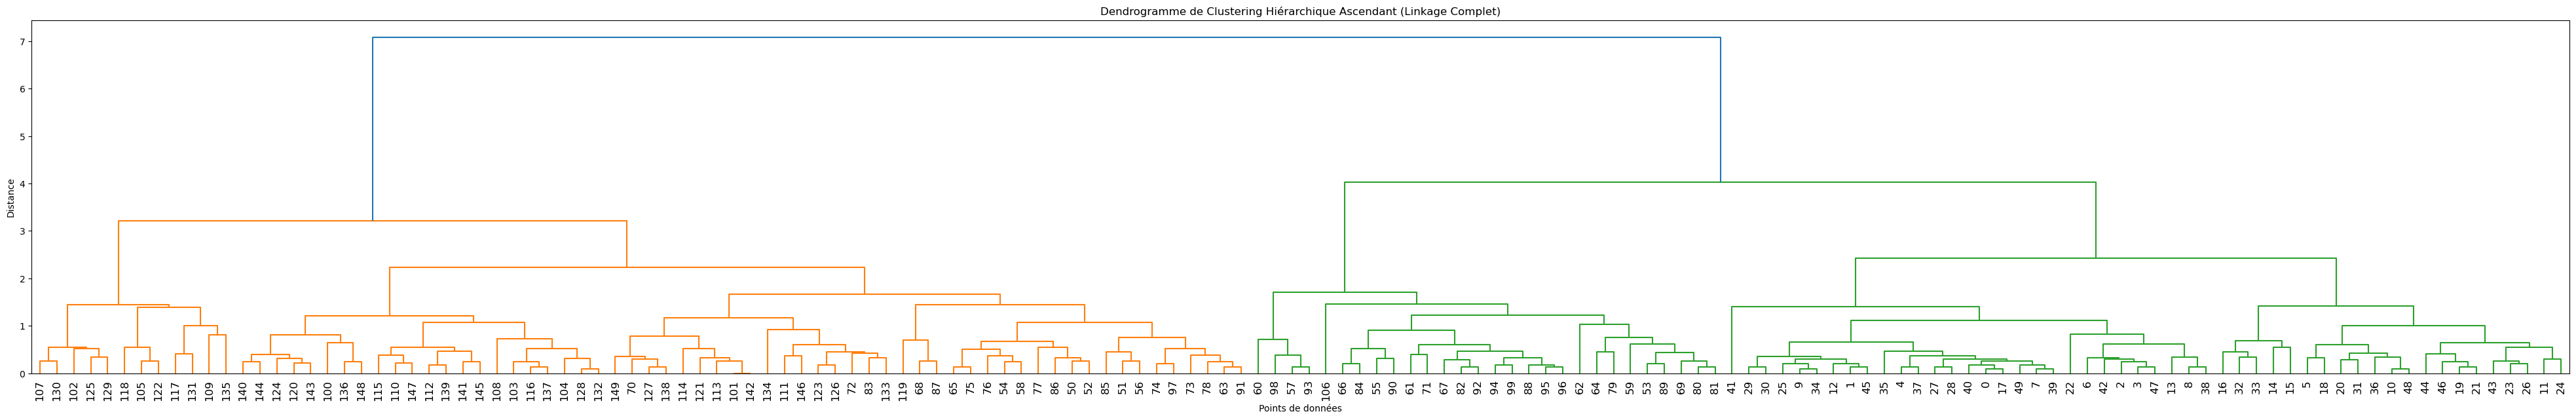

In [904]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Étape 1 : Clustering hiérarchique avec AgglomerativeClustering
# Ici, on effectue le clustering, mais pour le dendrogramme, on va utiliser 'linkage'
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clusters = agg_clustering.fit_predict(df)

# Étape 2 : Affichage du dendrogramme
# Calcul du linkage complet
Z = linkage(df, method='complete', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(50, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogramme de Clustering Hiérarchique Ascendant (Linkage Complet)")
plt.xlabel("Points de données")
plt.ylabel("Distance")
plt.show()

### Q4.3 Effectuez un clustering hiérarchique ascendant avec un linkage complet et affichez le dendrogramme résultant

**Anaylse:** *En coupant le dendrogramme à 3 clusters, vous obtenez une partition avec exactement 3 groupes distincts. Vous pouvez visualiser ces groupes en projetant les deux premières variables des données, ici la longueur et la largeur des sépales.*

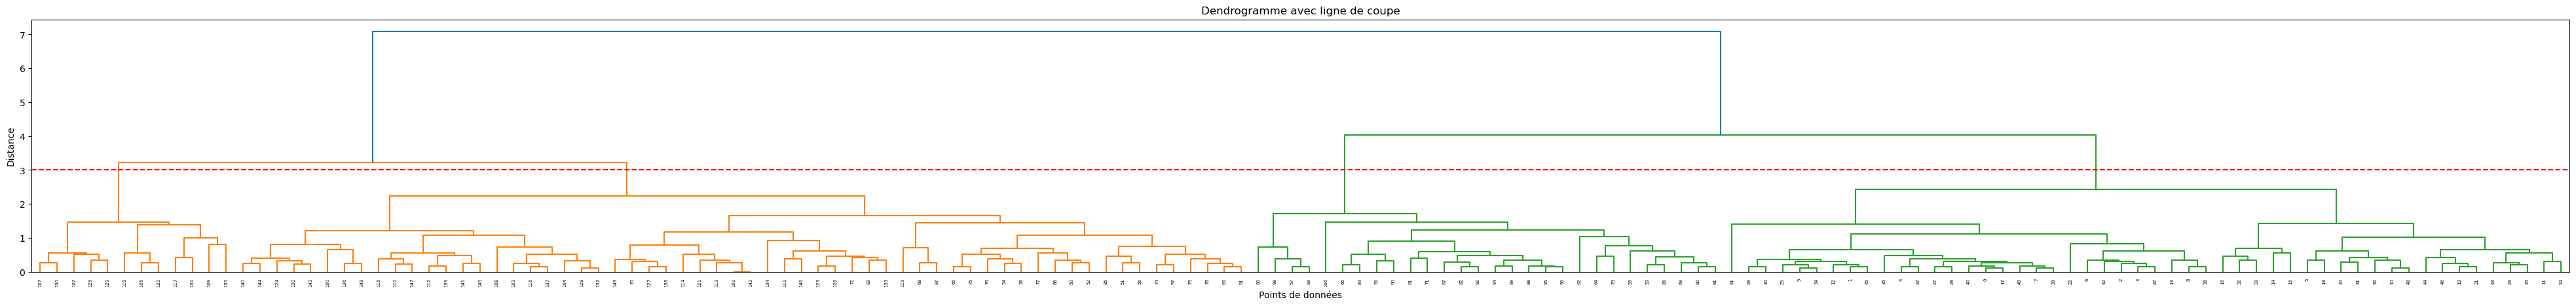

In [905]:
from scipy.cluster.hierarchy import fcluster

# Couper le dendrogramme à 3 clusters
max_d = 3
clusters_cut = fcluster(Z, max_d, criterion='maxclust')

# Affichage des clusters obtenus
plt.figure(figsize=(50, 5))
dendrogram(Z)
plt.axhline(y=3, color='r', linestyle='--')  # ligne de coupe
plt.title("Dendrogramme avec ligne de coupe")
plt.xlabel("Points de données")
plt.ylabel("Distance")
plt.show()

### Q4.4 Affichez le tableau de contingence comparant vos r´esultats avec les labels théoriques. Commentez vos résultats

**Réponse:** 

**Setosa (Cluster 0) :**

**Prédictions :** *Toutes les 50 observations de Setosa ont été regroupées dans un seul cluster (Cluster 0).*

**Conclusion :** *Cela indique que le modèle a parfaitement identifié toutes les Setosa, ce qui est un bon résultat.*

**Versicolor (Cluster 1) :**

**Prédictions :** *23 observations de Versicolor ont été regroupées dans le cluster 1 et 27 dans le cluster 2.*

**Conclusion :** *Cela indique que les Versicolor sont réparties entre deux clusters, ce qui suggère que ce groupe est hétérogène et pourrait nécessiter une analyse plus approfondie pour une meilleure séparation.*

**Virginica (Cluster 2) :**

**Prédictions :** *49 observations de Virginica ont été classées dans le cluster 1 et seulement 1 dans le cluster 2.*

**Conclusion :** *Cela montre également que la majorité des Virginica sont regroupées dans le cluster 1, mais comme pour les Versicolor, il y a un certain chevauchement.*

**Valeurs nulles :**

*Les lignes du tableau correspondent aux classes réelles et les colonnes aux clusters prédits. Le fait qu'il y ait des lignes (clusters) qui ne contiennent aucune observation (par exemple, la ligne pour le cluster 0 et le cluster 3) indique que certaines combinaisons de classe-cluster n'ont pas été observées.*


Tableau de contingence pour linkage complet :
[[ 0  0  0 50]
 [ 0 23 27  0]
 [ 0 49  1  0]
 [ 0  0  0  0]]


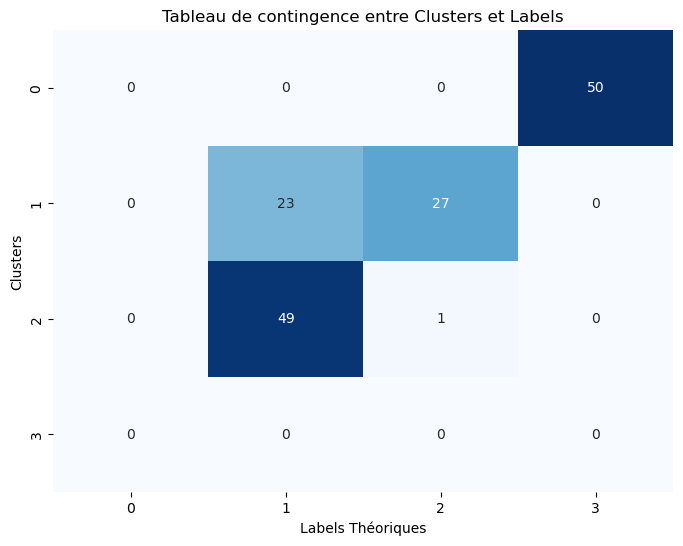

In [906]:
# Créer le tableau de contingence
contingency_table = confusion_matrix(iris.target, clusters_cut)

# Affichage du tableau de contingence
print("\nTableau de contingence pour linkage complet :")
print(contingency_table)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tableau de contingence entre Clusters et Labels")
plt.xlabel("Labels Théoriques")
plt.ylabel("Clusters")
plt.show()

### Q4.5 Refaites les questions 2) à 4) en utilisant un linkage moyen. Comparez les résultats et dites laquelle des deux méthodes vous semble meilleure.

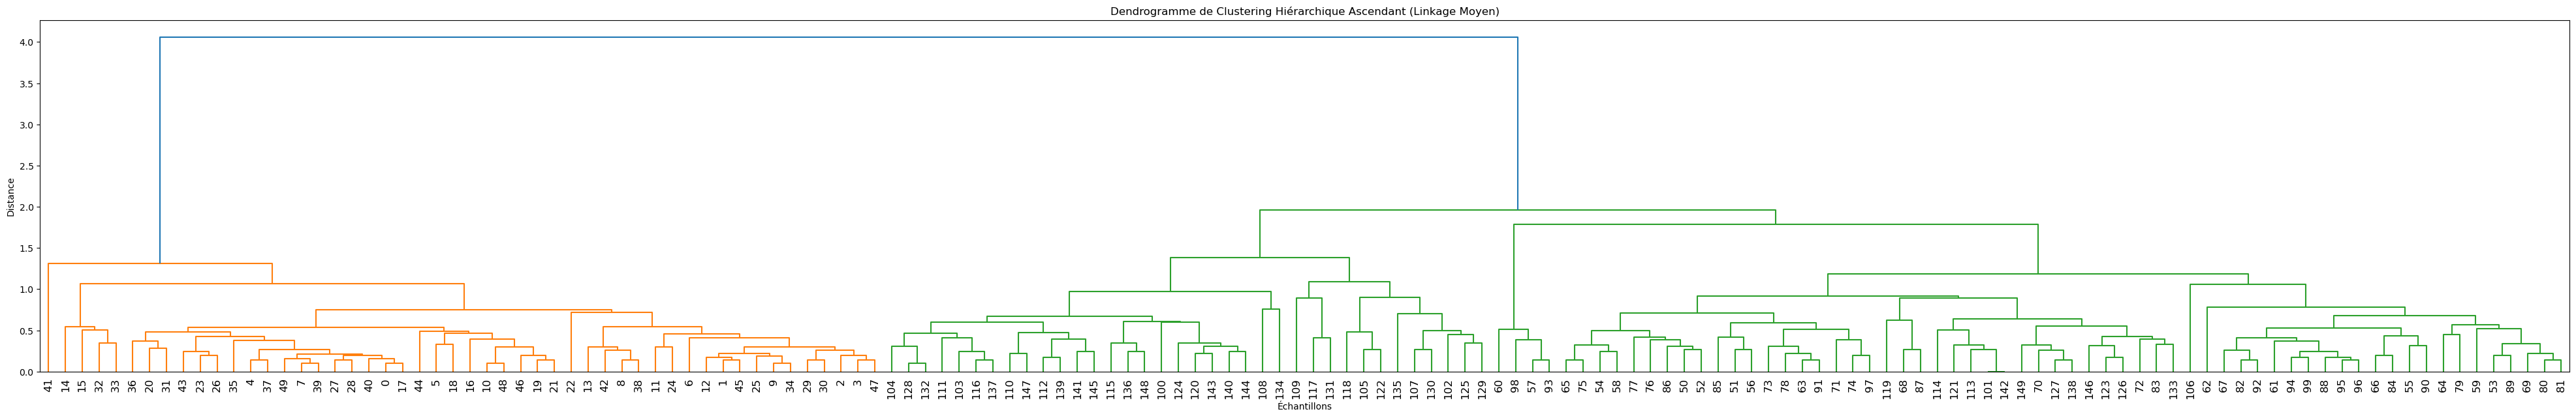

In [907]:
# Clustering hiérarchique avec linkage moyen
Z_average = linkage(df, method='average', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(50, 7))
dendrogram(Z_average, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogramme de Clustering Hiérarchique Ascendant (Linkage Moyen)")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.show()


In [908]:
# Déterminer les clusters à partir du dendrogramme (3 clusters)
clusters_average = fcluster(Z_average, 3, criterion='maxclust')

# Affichage des clusters obtenus
print("Clusters obtenus avec linkage moyen :\n", clusters_average)


Clusters obtenus avec linkage moyen :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]



Tableau de contingence pour linkage moyen :
[[ 0 50  0  0]
 [ 0  0  0 50]
 [ 0  0 36 14]
 [ 0  0  0  0]]


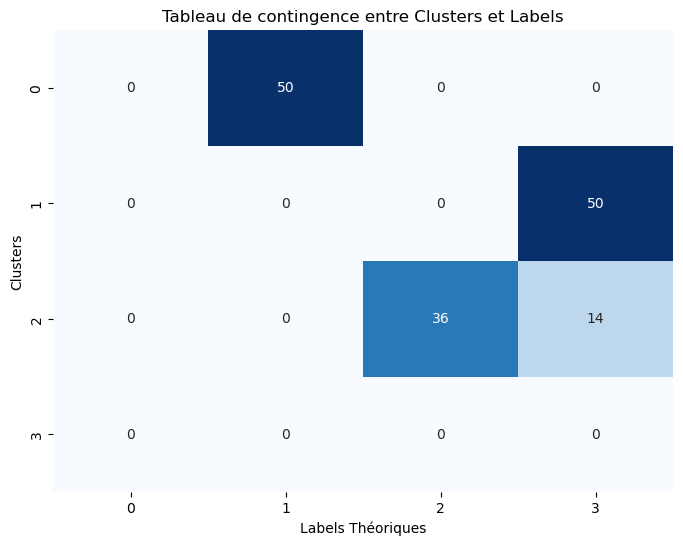

In [909]:
# Comparer les clusters obtenus avec les labels théoriques
contingence_table_average = confusion_matrix(labels, clusters_average)

# Afficher le tableau de contingence
print("\nTableau de contingence pour linkage moyen :")
print(contingence_table_average)

#  Visualisation du tableau de contingence
plt.figure(figsize=(8, 6))
sns.heatmap(contingence_table_average, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tableau de contingence entre Clusters et Labels")
plt.xlabel("Labels Théoriques")
plt.ylabel("Clusters")
plt.show()


**Réponse:**

**Setosa :** *Tous les 50 échantillons sont classés dans le cluster 2.*

**Versicolor :** *Tous les 50 échantillons sont classés dans le cluster 3.*

**Virginica :** *36 échantillons sont classés dans le cluster 3 et 14 dans le cluster 2.
Ici, les résultats montrent que le setosa est complètement séparé, mais versicolor et virginica sont complètement confondus.*

**Linkage Complet** semble donner une meilleure séparation entre les classes, particulièrement pour le setosa, tandis que versicolor et virginica montrent une certaine confusion.

**Linkage Moyen**, en revanche, montre une séparation presque parfaite du setosa, mais entraîne une confusion complète entre les deux autres classes.

*Dans ce cas, Versicolor n'a pas été correctement identifié du tout et tous les échantillons ont été incorrectement regroupés dans Virginica. Cela suggère que Linkage Moyen est à peine capable de faire la distinction entre les deux catégories, ce qui entraîne une plus grande confusion.*

*Sur la base du diagramme, je pense que Linkage Complet serait préférable.*

### Q4.6 Calculez les indices de Silhouette pour les 2 partitions (linkage complet et linkage moyen). Les résultats de la questions 5) sont-ils confirmés ? Commentez.

In [910]:
# Calcul des indices de Silhouette
silhouette_complete = silhouette_score(df, clusters)
silhouette_average = silhouette_score(df, clusters_average)

print(f"Indice de Silhouette pour linkage complet : {silhouette_complete:.2f}")
print(f"Indice de Silhouette pour linkage moyen : {silhouette_average:.2f}")


Indice de Silhouette pour linkage complet : 0.51
Indice de Silhouette pour linkage moyen : 0.55


*L'indice de silhouette est une mesure utilisée pour évaluer l'efficacité du regroupement, avec des valeurs allant de -1 à 1. Plus la valeur est élevée, plus le regroupement est efficace : proche de 1 : les échantillons sont bien affectés à leur propre groupe et sont éloignés des échantillons des autres groupes. Proche de 0 : les échantillons sont situés aux limites des grappes et il est difficile de déterminer leur appartenance. Proche de -1 : l'échantillon est assigné de manière incorrecte à la mauvaise grappe*

**Comparaison de l'indice de Silhouette :** *L'indice de Silhouette pour les connexions moyennes (0,55) est plus élevé que l'indice de Silhouette pour les connexions complètes (0,51). Cela signifie que les regroupements de connexions moyennes sont relativement meilleurs en général, même s'ils présentent une plus grande confusion dans la matrice de confusion.*

## 5 Nombre optimal de clusters sur les données atmosph`ere d’exoplanète

Dans cet exercice, on va évaluer le nombre de cluster optimal dans un jeu de donn´ees artificiel décrivant des compositions atmosph´erique d’exoplanètes.

### Q5.1. Ouvrez le fichier planete.csv et retirez la dernière colonne qui contient les labels.

In [911]:
import pandas as pd

# Charger le fichier CSV (en supposant que le fichier s'appelle 'planete.csv')
df2 = pd.read_csv('data/planete.csv', delimiter=';')

# Supprimer la colonne 'Type' qui contient les labels
data_without_labels = df2.drop('Type', axis=1)

# Extraire les labels (dernière colonne)
labels = df2['Type']

# Affichage des données sans les labels
print("Données sans labels :")
print(data_without_labels)

# Affichage des labels
print("\nLabels :")
print(labels)

Données sans labels :
     PH2O   PHe  PCH4    PH2   PN2  PNH3   PO2   PAr   PCO2   PSO2    PK
0     0.0   8.7   1.3  87.30   0.0  2.70   0.0  0.00   0.00   0.00  0.00
1     0.0   0.0   0.0   0.00   0.0  0.00   0.0  0.00   0.00   0.00  0.02
2     0.1   7.1   1.7  86.45   0.0  1.15   0.0  0.00   0.00   3.50  0.00
3     0.0   2.7   0.0   3.70  41.5  0.00  31.3  6.60  14.20   0.00  0.00
4     0.1  11.4   1.1  86.10   0.0  0.20   0.0  0.00   0.00   1.10  0.00
..    ...   ...   ...    ...   ...   ...   ...   ...    ...    ...   ...
995   0.0   0.0   0.0   0.00   3.8  0.50   0.1  1.01  94.59   0.00  0.00
996   4.0   0.0   1.4   0.00  11.7  0.00   2.5  0.00  30.60  49.76  0.04
997   0.0   0.0   0.0   0.00   0.0  0.00   0.0  0.00   0.00   0.00  0.00
998   0.0   1.6   0.0  21.90  55.0  0.30  13.1  6.50   1.60   0.00  0.00
999   0.0   0.0   0.0   0.00   0.5  0.20   0.0  0.00  99.30   0.00  0.00

[1000 rows x 11 columns]

Labels :
0      g
1      r
2      g
3      i
4      g
      ..
995    d
996

### Q5.2. Rappelez les propriétés de l’indice de Calinski-Harabasz et celles de l’indice de Davies-Boouldin

**Indice de Calinski-Harabasz**

**Définition :** *L'indice de Calinski-Harabasz est une mesure de la qualité du clustering. Il est calculé en prenant le rapport entre la variance entre les clusters et la variance au sein des clusters.*


*L'indice de Calinski-Harabasz est défini comme suit :*

$$
CH = \frac{B_k / (k - 1)}{W_k / (n - k)}
$$

où :
- \( B_k \) est la somme des carrés entre les clusters,
- \( W_k \) est la somme des carrés au sein des clusters,
- \( k \) est le nombre de clusters, et
- \( n \) est le nombre total d'échantillons.




**Interprétation :** *Un score élevé de l’indice de Calinski-Harabasz indique une bonne séparation entre les clusters et une faible variance au sein de chaque cluster. Il est souvent utilisé pour déterminer le nombre optimal de clusters : plus l'indice est élevé, meilleur est le clustering.*

**Indice de Davies-Bouldin**

**Définition :** *L'indice de Davies-Bouldin mesure la qualité du clustering en prenant en compte la distance entre les clusters et la taille de chaque cluster.*

*L'indice de Davies-Bouldin est défini comme suit :*

$$
DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

où :
- \( s_i \) est la moyenne des distances intra-cluster pour le cluster \( i \),
- \( d_{ij} \) est la distance entre les centres des clusters \( i \) et \( j \),
- \( k \) est le nombre de clusters.



**Interprétation :** *Un indice de Davies-Bouldin plus faible indique une meilleure séparation entre les clusters. Il est également utilisé pour déterminer le nombre optimal de clusters : un score faible est souhaitable, indiquant que les clusters sont bien séparés et compacts.*

### Q5.3. Utilisez la méthode du coude elbow pour d´eterminer le nombre optimal de clusters pour l’algorithme des K moyennes à partir des indices de Davies-Bouldin et Calinski-Harabasz. Expliquez avec vos mots ce que fait cette fonction.


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

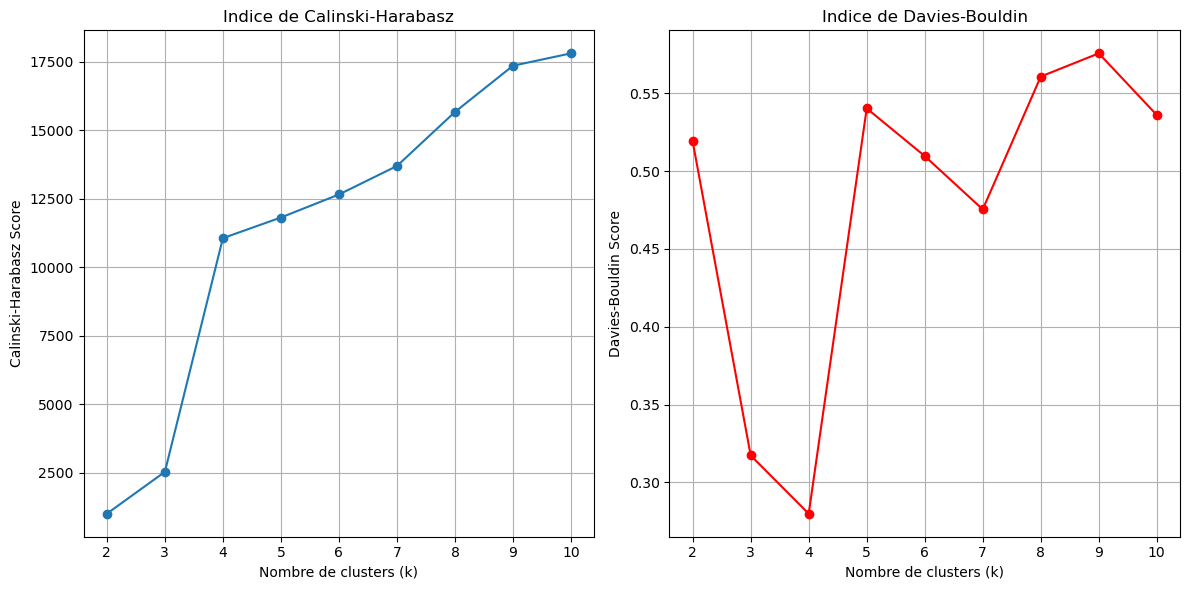

In [912]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Initialiser les listes pour les scores
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Tester différents nombres de clusters
k_range = range(2, 11)  # De 2 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_without_labels)
    
    # Calculer les scores
    ch_score = calinski_harabasz_score(data_without_labels, labels)
    db_score = davies_bouldin_score(data_without_labels, labels)
    
    calinski_harabasz_scores.append(ch_score)
    davies_bouldin_scores.append(db_score)

# Afficher les résultats
plt.figure(figsize=(12, 6))

# Indice de Calinski-Harabasz
plt.subplot(1, 2, 1)
plt.plot(k_range, calinski_harabasz_scores, marker='o')
plt.title('Indice de Calinski-Harabasz')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

# Indice de Davies-Bouldin
plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_scores, marker='o', color='r')
plt.title('Indice de Davies-Bouldin')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

plt.tight_layout()
plt.show()

**Indice de Calinski-Harabasz (à gauche) :**

*L'indice augmente de manière significative avec le nombre de clusters.*

*Il atteint un score élevé à partir de k=2 et continue d'augmenter jusqu'à k=10, atteignant des valeurs supérieures à 10,000. Cela indique une bonne séparation entre les clusters.*

**Indice de Davies-Bouldin (à droite) :**

*Cet indice présente des variations moins constantes.*

*Il diminue pour atteindre un minimum à k=4 puis augmente légèrement par la suite.
Un score plus faible indique une meilleure séparation entre les clusters, ce qui est observé à k=4.*

**En regardant le graphique, je pense que 4 serait un meilleur choix pour le nombre de clusters.**

### Q5.4 Commentez vos résultats. Vous pourrez utiliser des graphiques, des projections ACP et les labels pour appuyer vos explications.

1. Indice de Calinski-Harabasz : Si nous observons que le score augmente jusqu'à un certain point puis se stabilise ou commence à diminuer, cela suggère que le nombre optimal de clusters se trouve à ce point.

2. Indice de Davies-Bouldin : Si nous observons que les scores diminuent jusqu'à un certain point puis commencent à augmenter, cela indique également un bon nombre de clusters à ce point.

**En regardant le graphique précédent, je pense que 4 serait mieux (c'est-à-dire égaliser les deux indices, avec un grand indice de Calinski-Harabasz et un petit indice de Davies-Bouldin).**

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


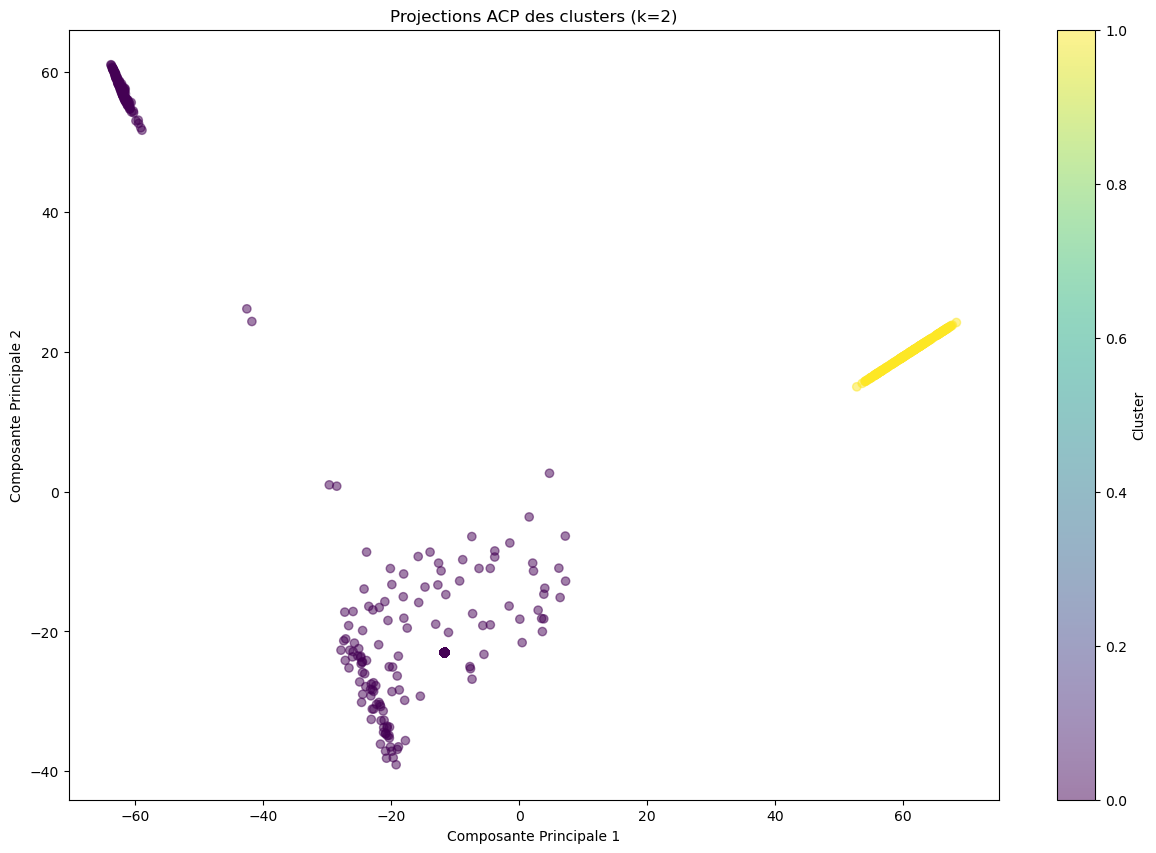

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


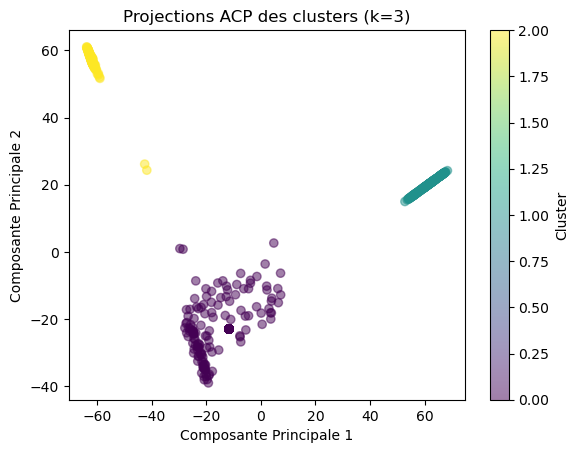

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


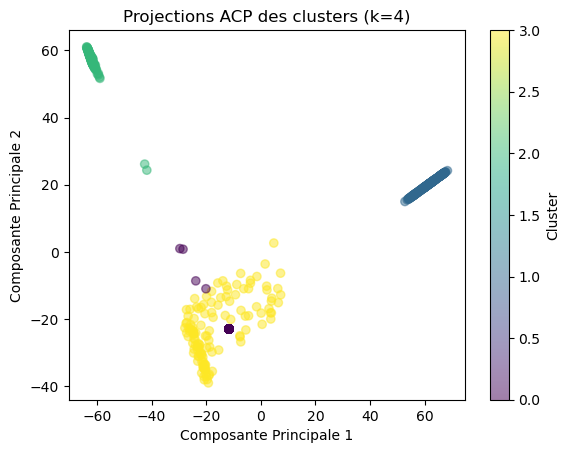

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


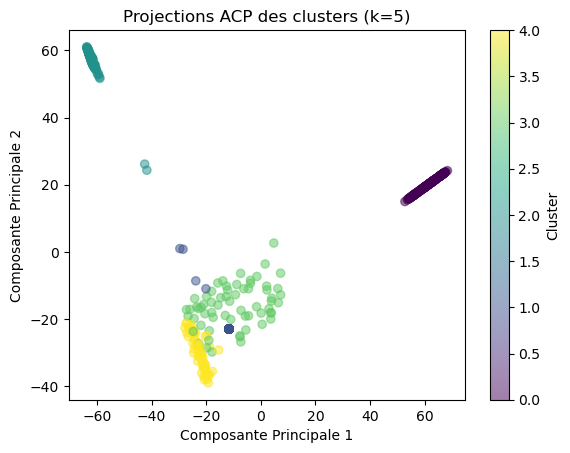

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


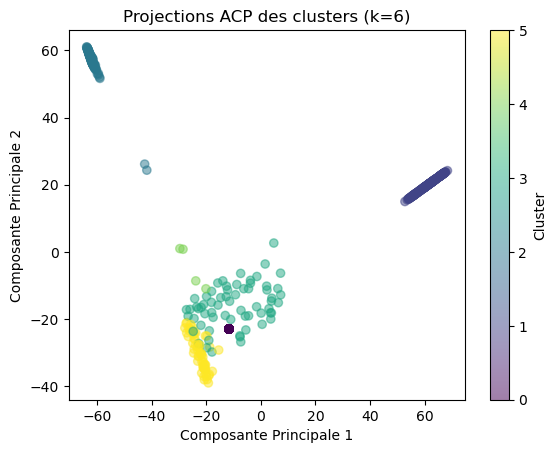

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


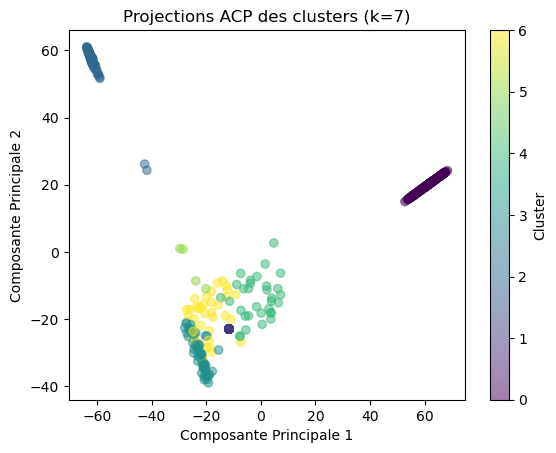

In [913]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_without_labels)


# Définir les valeurs de k à tester
k_values = range(2, 8)  # Valeurs de k allant de 2 à 7

# Créer une figure pour la visualisation
plt.figure(figsize=(15, 10))

# Boucle à travers les valeurs de k
for k_optimal in k_values:
    # Appliquer l'algorithme K-means
    kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
    labels_optimal = kmeans_optimal.fit_predict(data_without_labels)

    # Créer le nuage de points
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', alpha=0.5)
    plt.title(f'Projections ACP des clusters (k={k_optimal})')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.colorbar(label='Cluster')

    # Afficher l'image
    plt.show()

**D'après le diagramme, je pense qu'il est plus approprié de fixer le nombre de clusters à 3**

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

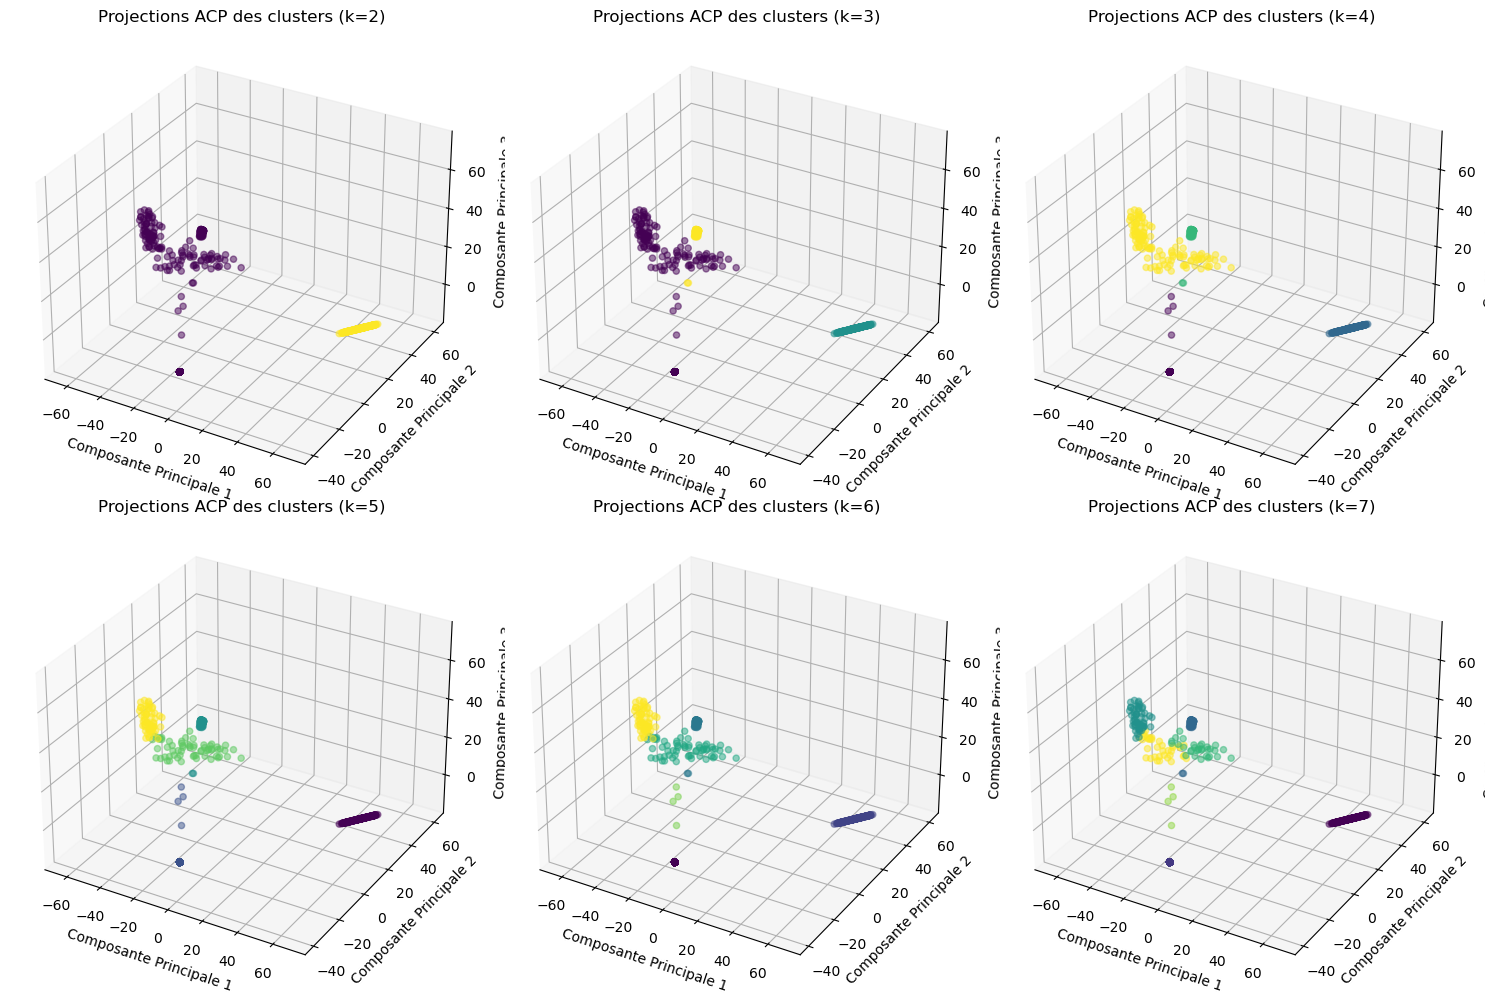

In [914]:
from mpl_toolkits.mplot3d import Axes3D



# Réaliser l'ACP pour réduire les dimensions à 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_without_labels)

# Définir les valeurs de k à tester
k_values = [2, 3, 4, 5, 6, 7]

# Créer une figure pour la visualisation des graphiques 3D
fig = plt.figure(figsize=(15, 10))

# Boucle à travers les valeurs de k pour créer les graphiques
for i, k_optimal in enumerate(k_values):
    # Appliquer l'algorithme K-means pour chaque valeur de k
    kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
    labels_optimal = kmeans_optimal.fit_predict(data_without_labels)

    # Créer un sous-graphique 3D pour chaque k
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    # Créer le nuage de points en 3D
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_optimal, cmap='viridis', alpha=0.5)

    # Titre du graphique
    ax.set_title(f'Projections ACP des clusters (k={k_optimal})')
    # Étiquettes des axes
    ax.set_xlabel('Composante Principale 1')
    ax.set_ylabel('Composante Principale 2')
    ax.set_zlabel('Composante Principale 3')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
# Afficher la figure
plt.show()

**D'après le diagramme(2D), je pense qu'il est plus approprié de fixer le nombre de clusters à 3**

**D'après le diagramme(3D), je pense qu'il est plus approprié de fixer le nombre de clusters à 3 ou 4**

**Ceci est également largement cohérent avec les conclusions de notre analyse de l'Indice de Calinski-Harabasz et de l'Indice de Davies-Bouldin,3-4**